# Sentinel-2 L2A Cloud Mask Time Series via Sentinel-Hub Process API

### _Import functional dependencies and add repository source directory to system path_

In [1]:
import os
import yaml
from munch import munchify

In [2]:
# define repo name and get root working directory
repo = 'sentinelhub'
root_path = os.getcwd()[ 0 : os.getcwd().find( repo ) + len ( repo )]
root_path

'C:\\Users\\Chris.Williams\\Documents\\GitHub\\sentinelhub'

In [3]:
# add repo source directory to system path
import sys
sys.path.insert(0, os.path.join( root_path, 'src' ) )
sys.path.insert(0, os.path.join( root_path, 'notebooks' ) )

In [4]:
# get path to configuration files
cfg_path = os.path.join( root_path, 'cfg' )
cfg_path = os.path.join( cfg_path, 'sentinel-2' )
cfg_path

'C:\\Users\\Chris.Williams\\Documents\\GitHub\\sentinelhub\\cfg\\sentinel-2'

### _Load configuration file from repository cfg sub-directory_ 

In [5]:
# get pathname to configuration file
cfg_file = os.path.join( cfg_path, 's2-timeseries-cloud.yml' )

In [6]:
# print contents of configuration file
with open( cfg_file ) as f:
    print ( f.read() )

request:
    collection: SENTINEL2_L2A
    evalscript: |
                //VERSION=3
                function setup() {
                    return {                
                        input: [{
                            bands:["B02", "B03", "B04", "AOT", "SCL", "SNW", "CLD", "sunAzimuthAngles", "sunZenithAngles", "viewAzimuthMean", "viewZenithMean"], units:"DN"
                        }],
                        output: [
                            {id: "TrueColor", bands: 3, sampleType: SampleType.FLOAT32},
                            {id: "AOT", bands: 1, sampleType: SampleType.FLOAT32},
                            {id: "SCL", bands: 1, sampleType: SampleType.FLOAT32},
                            {id: "SNW", bands: 1, sampleType: SampleType.FLOAT32},
                            {id: "CLD", bands: 1, sampleType: SampleType.FLOAT32},
                            {id: "SAA", bands: 1, sampleType: SampleType.FLOAT32},
                            {id: "SZA", bands: 1, sampleType: S

In [7]:
# load cfg file using yaml parser
with open( cfg_file, 'r' ) as f:
    config = munchify( yaml.safe_load( f ) )

### _Define bounding box collocated with northern Finland_

In [8]:
# define min and max latlons
coords = 24.290010,65.534646,26.986816,66.644373
resolution = 100

In [9]:
# create instance of shclient class
from client import ShClient
client = ShClient( config )

In [10]:
# get utm bbox
bbox = client.getBoundingBox( coords )
print ( bbox, bbox.crs.value )

374796.4356566694,7270737.727232179,499416.75970823364,7391736.7593210535 32635


In [11]:
# get aoi image dimensions
client.getBoxDimensions( bbox, resolution )

(1246, 1210)

### _Use Catalog API to identify collocated S2 scenes acquired between late January and February 2021_

In [12]:
# pick a few dates
from datetime import datetime
timeframe = { 'start' : datetime( 2021, 1, 25, 0, 0, 0 ), 
                'end' : datetime( 2021, 2, 1, 23, 59, 59 ) }

In [13]:
# get S2 acquisitions between start / end dates satisfying filter conditions
timestamps = client.getTimeStamps ( bbox, timeframe )
timestamps

[datetime.datetime(2021, 1, 25, 10, 2, 15, tzinfo=tzutc()),
 datetime.datetime(2021, 1, 28, 10, 12, 3, tzinfo=tzutc()),
 datetime.datetime(2021, 1, 31, 10, 21, 55, tzinfo=tzutc()),
 datetime.datetime(2021, 2, 1, 9, 51, 56, tzinfo=tzutc())]

### _Download S2 L2A ancillary datasets using Process API client_

In [14]:
# get time series
response = client.getTimeSeries ( bbox, timeframe, resolution )
response._df

TrueColor.tif  \
0  [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...   
1  [[[6349.0, 5647.0, 6899.0], [6341.0, 5694.0, 6...   
2  [[[7081.0, 6269.0, 7539.0], [7150.0, 6294.0, 7...   
3  [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...   

                                             AOT.tif  \
0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
1  [[201.0, 201.0, 201.0, 201.0, 201.0, 201.0, 20...   
2  [[201.0, 201.0, 201.0, 201.0, 201.0, 201.0, 20...   
3  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

                                             SCL.tif  \
0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
1  [[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0,...   
2  [[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0,...   
3  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

                                             SNW.tif  \
0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
1  [[33.0, 43.0, 45.0, 41.0, 39.0, 28.0, 13.0, 15...   
2  [[15.0, 16.0, 26.0, 21.0, 24.0, 20.0, 12.0, 7....   
3  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

                                             CLD.tif  \
0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
1  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
2  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 1.0,...   
3  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

                                             SAA.tif  \
0  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   
1  [[174.221, 174.221, 174.221, 174.221, 174.221,...   
2  [[176.46, 176.46, 176.46, 176.46, 176.46, 176....   
3  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   

                                             SZA.tif  \
0  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   
1  [[84.8457, 84.8457, 84.8457, 84.8457, 84.8457,...   
2  [[83.9466, 83.9466, 83.9466, 83.9466, 83.9466,...   
3  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   

                                             VAM.tif  \
0  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   
1  [[146.74692, 146.74692, 146.74692, 146.74692, ...   
2  [[306.2144, 306.2144, 306.2144, 306.2144, 306....   
3  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   

                                             VZM.tif                      time  
0  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,... 2021-01-25 10:02:15+00:00  
1  [[2.5912669, 2.5912669, 2.5912669, 2.5912669, ... 2021-01-28 10:12:03+00:00  
2  [[6.2132483, 6.2132483, 6.2132483, 6.2132483, ... 2021-01-31 10:21:55+00:00  
3  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,... 2021-02-01 09:51:56+00:00

### _Visualise time series of L2A ancillary products_

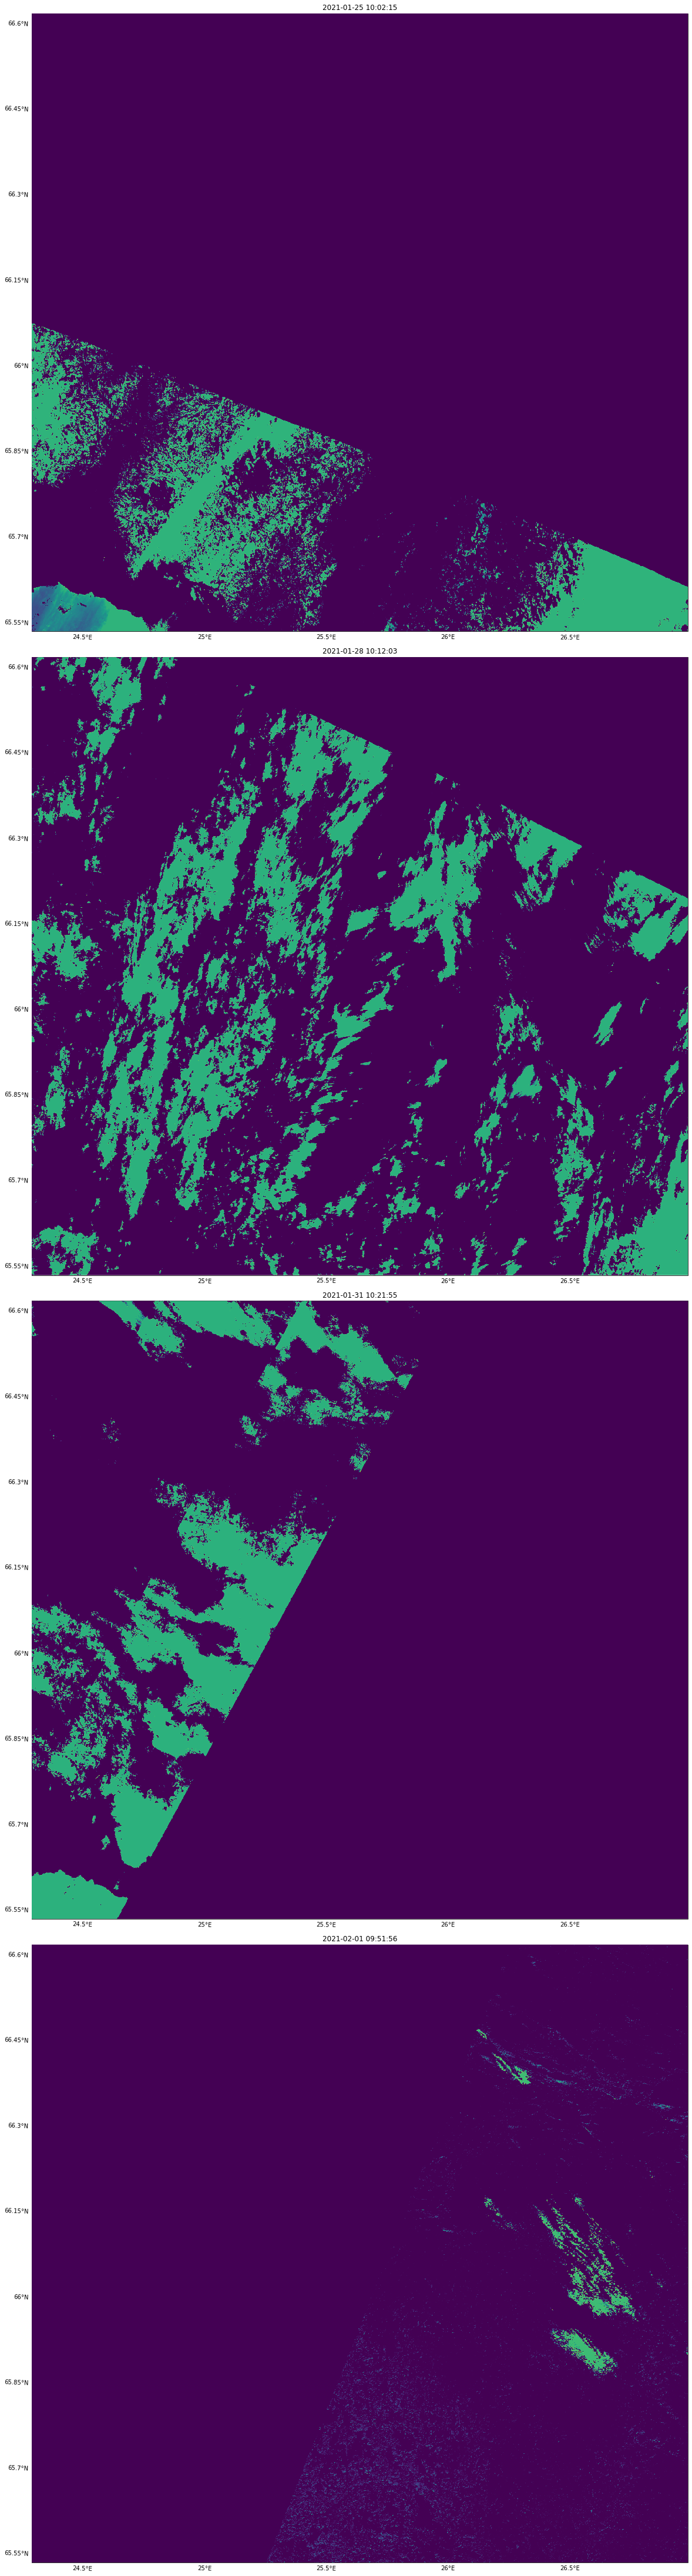

In [15]:
# show cloud mask products
response.plotImages( 'CLD.tif', alpha={ 'data' : 1.0, 'grid' : 0.0 } )

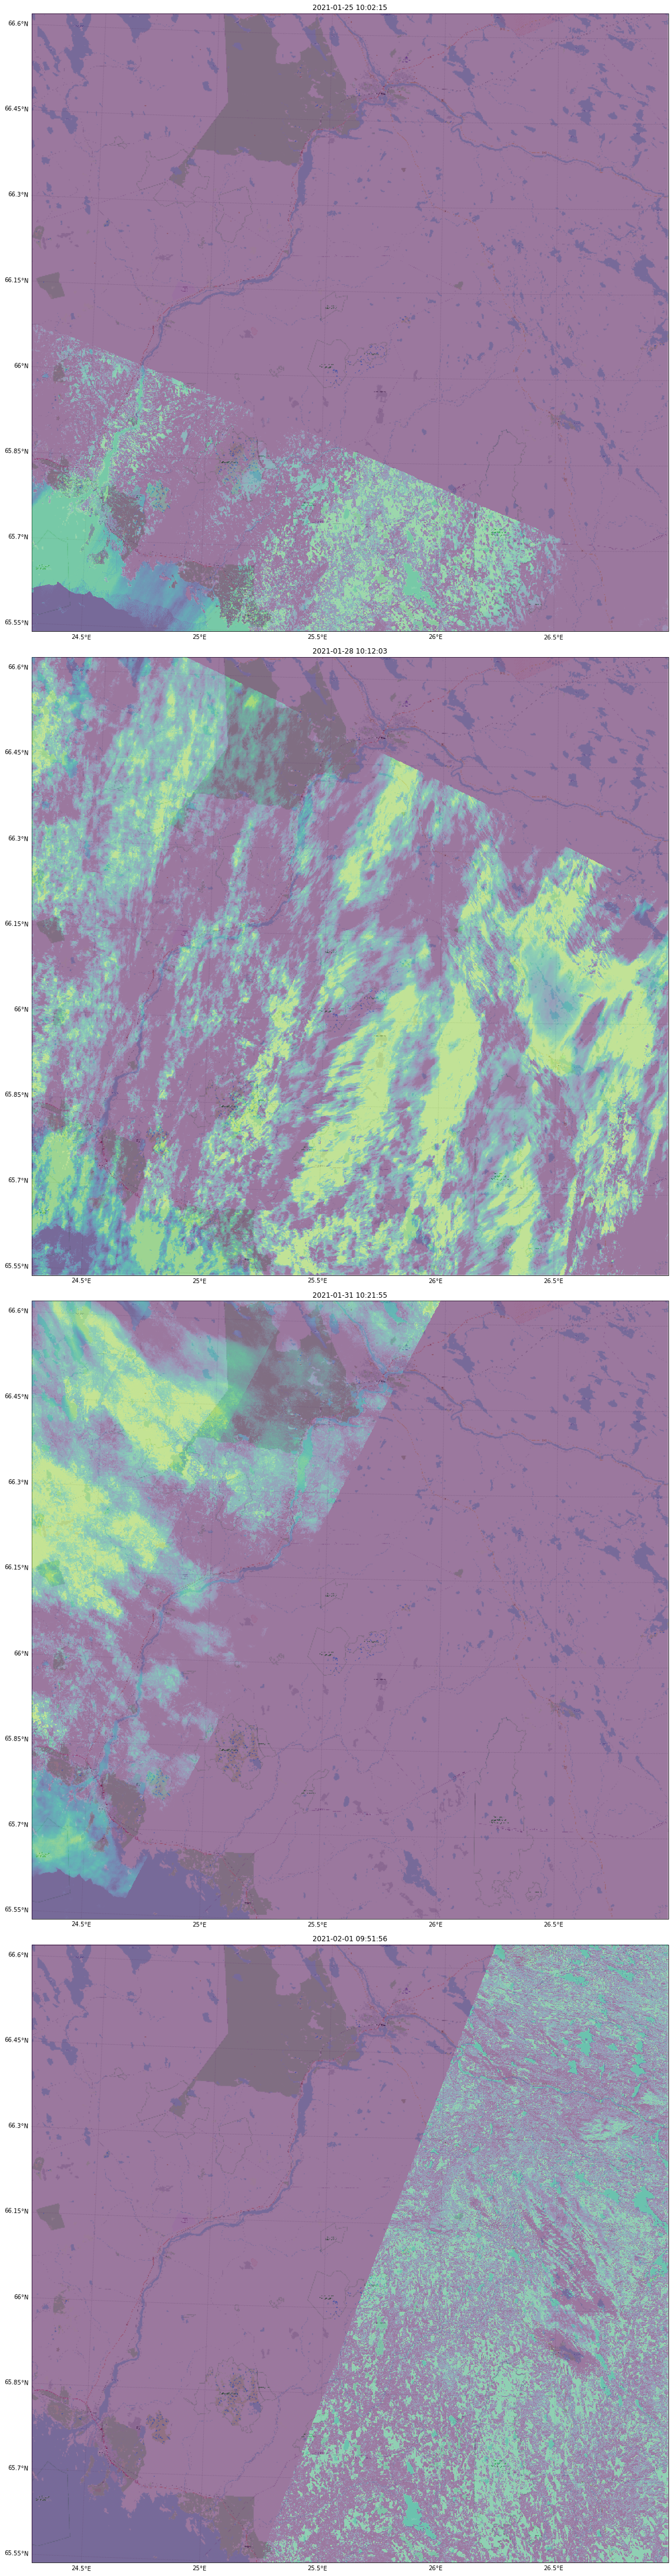

In [16]:
# show snow mask products
response.plotImages( 'SNW.tif', osm_zoom=11, alpha={ 'data' : 0.5, 'grid' : 0.5 } )

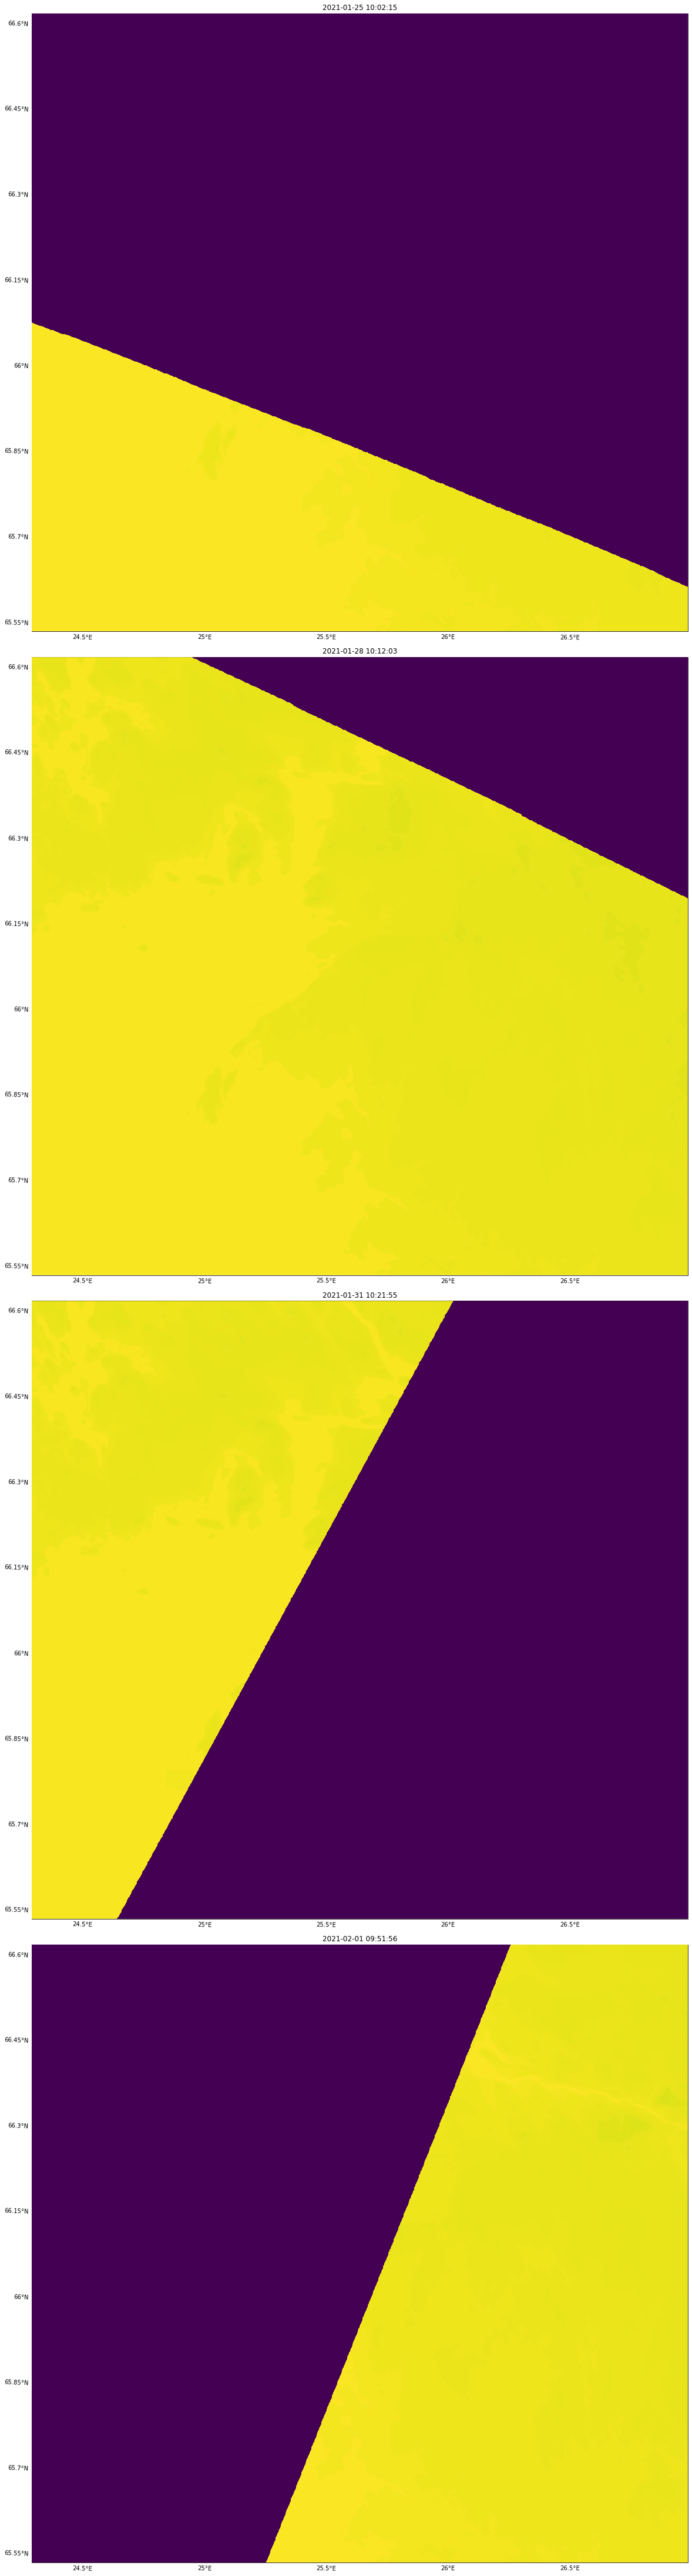

In [17]:
# show aerosol optical thickness products
response.plotImages( 'AOT.tif', alpha={ 'data' : 1.0, 'grid' : 0.0 } )

### _Plot Aerosol Optical Thickness image histogram_

In [18]:
# flatten 2nd aot image
row = response._df.iloc[ 0 ]
aot = row[ 'AOT.tif' ].flatten()

In [19]:
# stats of aerosol optical thickness
import numpy as np
import numpy.ma as ma

aot_mask = ma.masked_where(aot == 0, aot)
np.amin( aot_mask ), np.amax( aot_mask )

(198.0, 205.0)

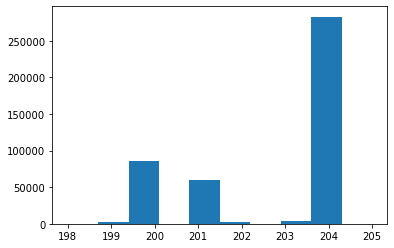

In [20]:
import matplotlib.pyplot as plt

# histogram of aot
plt.hist( aot_mask )
plt.show()